In [12]:
# # IMPORTS
# astronomy
from astropy.io import fits
# plotting 
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import matplotlib as mpl
# data 
import numpy as np
# file IO
import csv
# my python files 
import match
import v2_AGN_DataAndPlotting as adp
import v2_SED as SED
adp.SetStyle()

# Data

In [13]:
# get data
f = adp.UnpackTable(adp.path_csv+'\\AGN_NH_estimates_Kelly+2024_update.csv')
for k,v in f.items() :
    if(k == 'ID') : 
        f[k] = np.array(v, dtype=int)
    elif(k == 'GROUP') : 
        f[k] = np.array(v, dtype=str)
    else :
        f[k] = np.array(v, dtype=float)

f['GROUP'] = np.array(["RED" if (x == "\"RED\"") else x for x in f['GROUP']], dtype=str)
f['GROUP'] = np.array(["GRN" if (x == "\"GRN\"") else x for x in f['GROUP']], dtype=str)
f['GROUP'] = np.array(["BLU" if (x == "\"BLU\"") else x for x in f['GROUP']], dtype=str)


print(list(f.keys()))

['ID', 'GROUP', 'Z', 'LOG_LIR', 'LOG_LX_INT', 'LOG_LX', 'LOG_LXLIM', 'LOG_LXIR_THEORY', 'LOG_NH_THEORY', 'SIG_POS_THEORY', 'SIG_NEG_THEORY', 'LOG_LXIR_INTRIN', 'LOG_NH_INTRIN', 'SIG_POS_INTRIN', 'SIG_NEG_INTRIN']


In [14]:
# read file 
f2 = adp.UnpackTable(adp.path_csv+'\\New_Lx_cat.csv')
print(list(f2.keys()))
# fix types
f2['ID']   = np.array(f2['ID'], dtype=int)
f2['z']    = np.array(f2['z'],  dtype=float)
f2['Lx_05_10']     = np.log10(np.array(f2['Lx_05_10'],     dtype=float)) # log scale
f2['Lx_hard_2_10'] = np.log10(np.array(f2['Lx_hard_2_10'], dtype=float)) # log scale
f2['Nh']           = np.log10(np.array(f2['Nh'], dtype=float)) # log scale
# f2['Nh']           = np.array(f2['Nh'], dtype=float) # log scale


['ID', 'z', 'Lx_05_10', 'Lx_hard_2_10', 'Nh']


C:\Users\polar\AppData\Local\Temp\ipykernel_9052\942594776.py:7: RuntimeWarning: divide by zero encountered in log10
  f2['Lx_05_10']     = np.log10(np.array(f2['Lx_05_10'],     dtype=float)) # log scale
C:\Users\polar\AppData\Local\Temp\ipykernel_9052\942594776.py:7: RuntimeWarning: invalid value encountered in log10
  f2['Lx_05_10']     = np.log10(np.array(f2['Lx_05_10'],     dtype=float)) # log scale
C:\Users\polar\AppData\Local\Temp\ipykernel_9052\942594776.py:8: RuntimeWarning: divide by zero encountered in log10
  f2['Lx_hard_2_10'] = np.log10(np.array(f2['Lx_hard_2_10'], dtype=float)) # log scale
C:\Users\polar\AppData\Local\Temp\ipykernel_9052\942594776.py:8: RuntimeWarning: invalid value encountered in log10
  f2['Lx_hard_2_10'] = np.log10(np.array(f2['Lx_hard_2_10'], dtype=float)) # log scale
C:\Users\polar\AppData\Local\Temp\ipykernel_9052\942594776.py:9: RuntimeWarning: divide by zero encountered in log10
  f2['Nh']           = np.log10(np.array(f2['Nh'], dtype=float)) # lo

In [15]:
# add NH in order of IDs in f. sone NH are -inf
k1, k2 = match.match(f['ID'], f2['ID'])

fCool = {}
# fix all!!
for k,v in f.items() : 
    fCool[k] = v[k1]

cosmosNHmatched = f2['Nh'][k2]
cosmosNHmatched_swapInfForNan = np.array([ np.nan if (x == -np.inf) else x for x in f2['Nh'][k2]])
fCool['LOG_NH_CAT'] = cosmosNHmatched_swapInfForNan

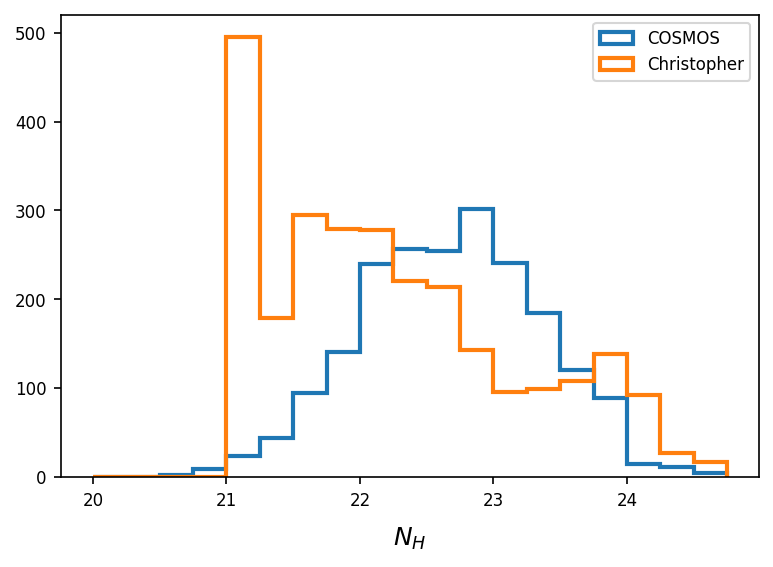

In [16]:

def Hists(n1, n2, xlabel="$N_H$") : 

    plt.hist(n1,bins=np.arange(20,25,0.25), histtype='step', linewidth=2, label="COSMOS")
    plt.hist(n2,bins=np.arange(20,25,0.25), histtype='step', linewidth=2, label="Christopher")
    plt.legend()
    plt.xlabel(xlabel)
    plt.show()

Hists(fCool['LOG_NH_CAT'], fCool['LOG_NH_INTRIN'])

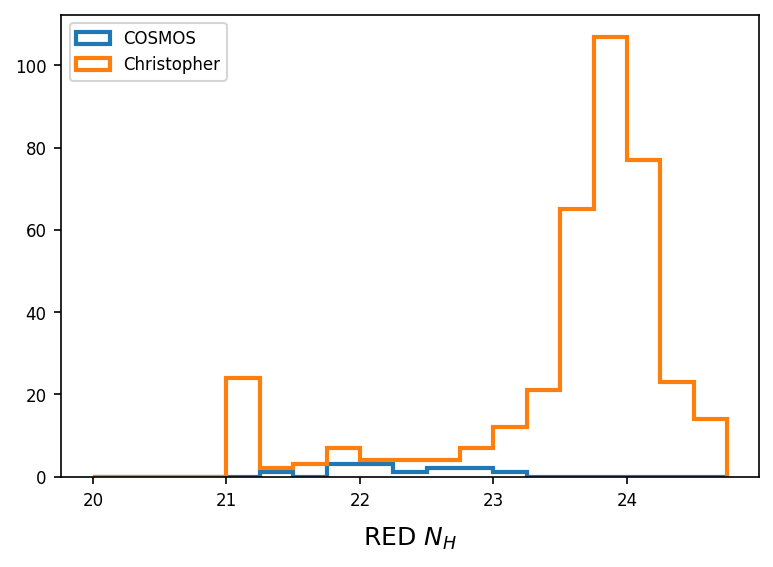

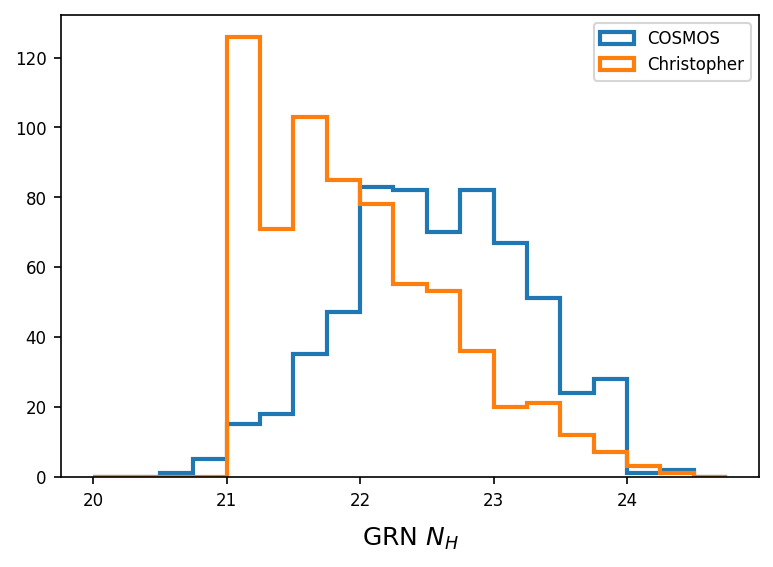

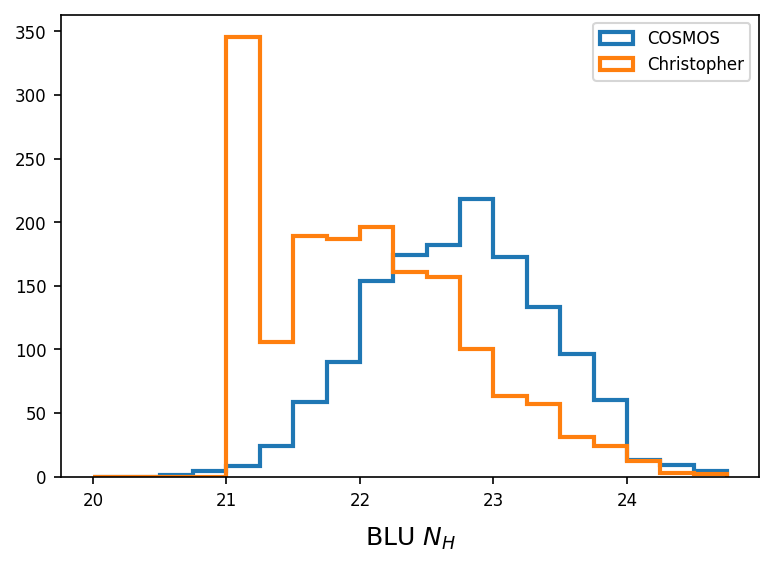

In [17]:
def HistsByc(f) :    
    r = np.where(f['GROUP'] == "RED")[0]
    g = np.where(f['GROUP'] == "GRN")[0]
    b = np.where(f['GROUP'] == "BLU")[0]

    Hists(f['LOG_NH_CAT'][r], f['LOG_NH_INTRIN'][r], "RED $N_H$")
    Hists(f['LOG_NH_CAT'][g], f['LOG_NH_INTRIN'][g], "GRN $N_H$")
    Hists(f['LOG_NH_CAT'][b], f['LOG_NH_INTRIN'][b], "BLU $N_H$")
    
HistsByc(fCool)

# Graph

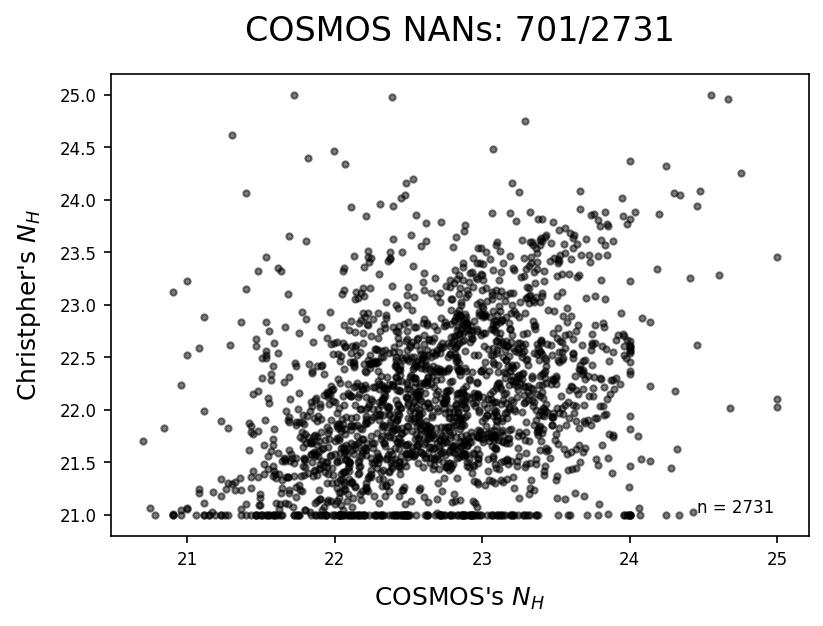

In [18]:
   
def Compare(cat, chris, c='k') : 
    plt.scatter(cat, chris, c=c, marker='.', alpha=0.5)
    plt.xlabel("COSMOS's $N_H$")
    plt.ylabel("Christpher's $N_H$")
    plt.title('COSMOS NANs: ' + str(len(np.where(np.isnan(cat))[0])) + '/' + str(len(cat)))
    adp.AddText_n(len(cat))
    plt.show()

Compare(fCool['LOG_NH_CAT'], fCool['LOG_NH_INTRIN'])

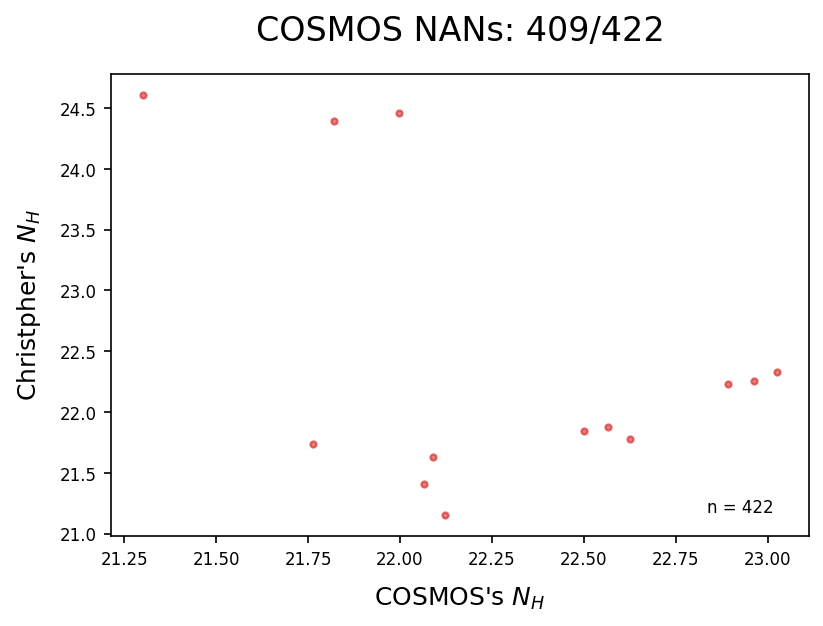

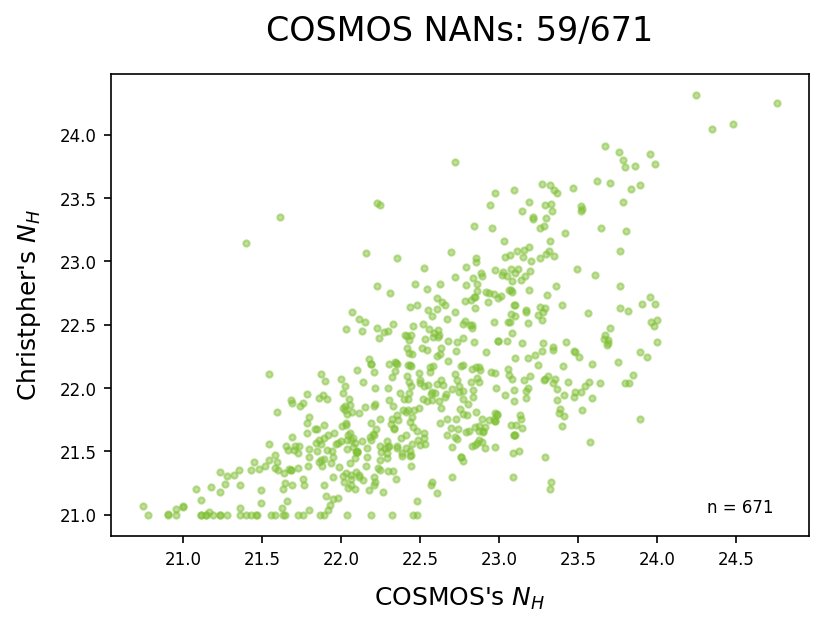

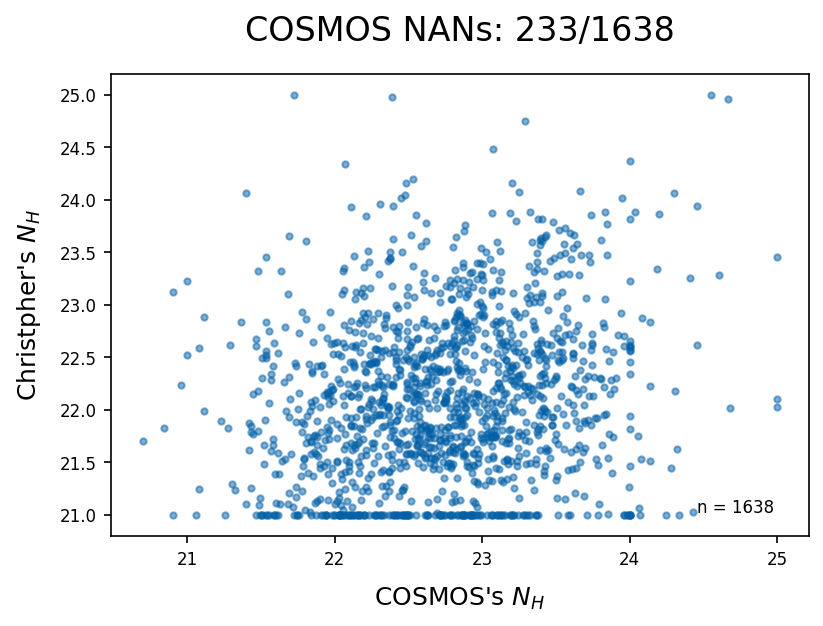

In [19]:
def CompareColors(f) : 
    r = np.where(f['GROUP'] == "RED")[0]
    g = np.where(f['GROUP'] == "GRN")[0]
    b = np.where(f['GROUP'] == "BLU")[0]

    Compare(f['LOG_NH_CAT'][r], f['LOG_NH_INTRIN'][r], c=adp.c_ir)
    Compare(f['LOG_NH_CAT'][g], f['LOG_NH_INTRIN'][g], c=adp.c_ir_xray)
    Compare(f['LOG_NH_CAT'][b], f['LOG_NH_INTRIN'][b], c=adp.c_xray)

CompareColors(fCool)

# Save

In [20]:
with open(adp.path_csv+'\\AGN_NH_estimates_Kelly+2024_update_COSMOS.csv', mode='w',newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['ID','GROUP','Z','LOG_LIR','LOG_LX_INT','LOG_LX','LOG_LXLIM','LOG_LXIR_THEORY','LOG_NH_THEORY','SIG_POS_THEORY','SIG_NEG_THEORY','LOG_LXIR_INTRIN','LOG_NH_INTRIN','SIG_POS_INTRIN','SIG_NEG_INTRIN','LOG_NH_COSMOS'])

    for i in range(len(fCool['ID'])) : 
        row = []
        for key,val in fCool.items() : 
            row.append(str(val[i]))
        writer.writerow(row)

    #  confirm 
    print('List saved: AGN_NH_estimates_Kelly+2024_update_COSMOS.csv')

List saved: AGN_NH_estimates_Kelly+2024_update_COSMOS.csv
